In [2]:
! git clone https://github.com/SOMJANG/Mecab-ko-for-Google-Colab.git

Cloning into 'Mecab-ko-for-Google-Colab'...
remote: Enumerating objects: 47, done.
remote: Counting objects: 100% (47/47), done.
remote: Compressing objects: 100% (42/42), done.
remote: Total 47 (delta 16), reused 20 (delta 5), pack-reused 0
Unpacking objects: 100% (47/47), done.


In [3]:
ls

Mecab-ko-for-Google-Colab/  sample_data/


In [4]:
cd Mecab-ko-for-Google-Colab/

/content/Mecab-ko-for-Google-Colab


In [5]:
!bash install_mecab-ko_on_colab190912.sh

Installing konlpy.....
     |████████████████████████████████| 19.4MB 20.4MB/s 
     |████████████████████████████████| 2.7MB 30.7MB/s 
     |████████████████████████████████| 92kB 9.9MB/s 
  Found existing installation: beautifulsoup4 4.6.3
    Uninstalling beautifulsoup4-4.6.3:
      Successfully uninstalled beautifulsoup4-4.6.3
  Found existing installation: tweepy 3.6.0
    Uninstalling tweepy-3.6.0:
      Successfully uninstalled tweepy-3.6.0
Done
Installing mecab-0.996-ko-0.9.2.tar.gz.....
from https://bitbucket.org/eunjeon/mecab-ko/downloads/mecab-0.996-ko-0.9.2.tar.gz
--2019-12-14 16:48:50--  https://bitbucket.org/eunjeon/mecab-ko/downloads/mecab-0.996-ko-0.9.2.tar.gz
Resolving bitbucket.org (bitbucket.org)... 18.205.93.2, 18.205.93.0, 18.205.93.1, ...
Connecting to bitbucket.org (bitbucket.org)|18.205.93.2|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://bbuseruploads.s3.amazonaws.com/eunjeon/mecab-ko/downloads/mecab-0.996-ko-0.9.2.tar.gz?

In [6]:
import os, sys 
from google.colab import drive 
drive.mount('/content/mnt') 
nb_path = '/content/notebooks' 
os.symlink('/content/mnt/My Drive/Colab Notebooks', nb_path) 
sys.path.insert(0, nb_path)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/mnt


In [7]:
cd /content/mnt/My Drive/Colab Notebooks

/content/mnt/My Drive/Colab Notebooks


In [0]:
import pandas as pd
from tqdm import tqdm

In [10]:
from konlpy.tag import Mecab
from konlpy.tag import Okt
okt = Okt()
mecab = Mecab()

/content/notebooks/jpype/_core.py:210: UserWarning: 
-------------------------------------------------------------------------------
Deprecated: convertStrings was not specified when starting the JVM. The default
behavior in JPype will be False starting in JPype 0.8. The recommended setting
for new code is convertStrings=False.  The legacy value of True was assumed for
this session. If you are a user of an application that reported this warning,
please file a ticket with the developer.
-------------------------------------------------------------------------------

  """)


In [0]:
train_data = pd.read_csv("train.csv")
test_data = pd.read_csv("public_test.csv")

In [13]:
test_data

,id,year_month,text
0,340000,2019-01,XXX고객님! 안녕하세요? 새롭게 시작하는 한 주 행복 가득하시길 기원합니다. 지난...
1,340001,2019-01,긴급 안내 XXX은행 가락동 지점 - 헬리오XXX 기본XXX 대출이자를 ...
2,340002,2019-01,XXX 고객님 안녕하세요올해는 미세먼지가 유난인거 같습니다.엊그제 새해가 시작된거같...
3,340003,2019-01,XXX 고객님찾아온 행운을 잡으셨나요? 못잡으셨다면 이번에 다시 잡으시길 기원합니다...
4,340004,2019-01,XXX 고객님새해 복 많이 받으세요 XXX은행 코스트코 퇴직연금 담당자입니다. 고...
...,...,...,...
1621,341621,2019-04,(광고)XXX 고객님안녕하십니까!!고객님의 소중한 업무처리를 도와드린 kb창원중앙동...
1622,341622,2019-04,고객님 항상 저희 지점을 거래해 주셔서 감사합니다 본점 서비스 설문 전화 받으시면...
1623,341623,2019-04,XXX 고객님 저희 XXX은행 XXX지점을 이용해주셔서 감사드립니다 이번주도 더 ...
1624,341624,2019-04,(광고)알림 신청하면 매일 현금 100만원! XXX부동산 리브온지금 XXX부동산 리...


In [20]:
test_text = list(test_data['text'])

test_clear_text = []

for i in tqdm(range(len(test_text))):
  test_clear_text.append(test_text[i].replace('XXX', ''))
test_clear_text

100%|██████████| 1626/1626 [00:00<00:00, 92262.32it/s]


['고객님! 안녕하세요? 새롭게 시작하는 한 주 행복 가득하시길 기원합니다. 지난주 글로벌 증시는 파월 미 연준 의장이 통화정책에 대해 완화적인 태도 변화를 보인 것이 주초 투자심리 개선으로 이어지며  큰 폭 상승 마감했습니다.  더불어 미중 차관급 무역협상이 순조롭게 진행된 점도 긍정적이었습니다. 원달러 환율이 주간 7.5원으로 하락하는 가운데 외국인 투자자의 국내증시 순매수 규모가 8천억을 상회하며  수급이 개선된 점도 주목해볼 필요가 있습니다. 금주 시장은 미국 금융주 실적발표를 시작으로 본격적인 실적 시즌에 진입하게 됩니다.  지난주 애플 삼성전자 등 주요기업들의 1분기 실적 전망 하향 조정이 있었던 점을 참고한다면  올해 글로벌 성장 둔화 기조속에서 기업들의 순익 감소 추이를  관심있게 살펴보실 필요가 있어 보입니다.  주 후반에는 브렉시트 영국 하원 표결이 예정되어 있습니다. 추워진 날씨에 건강 유의하시고 좋은 한주 되세요. 감사합니다.  은행송도센터올림',
 ' 긴급 안내  은행 가락동 지점  - 헬리오 기본    대출이자를 조합에서   납부했었으나 2018년 12월    25일부로 종료되었습니다.    - 따라서 2019년 1월25일부터   매월 25일 중도금대출이자를    계약자님께서 직접 납부   하셔야 됩니다. 방법안내 1. 자동이체 등록    은행영업점 본인방문      (신분증 지참)     직원에게       대출계좌       대출이자 자동납부로       계좌간 자동이체등록       요청    인터넷뱅킹 공인인증서       로그인 후 자동이체 등록 2. 자동이체 미등록 고객은    2019.1.25일까지 가까운    은행영업점 방문하여    대출이자 납부 3. 대출이자를 매월(25일)직접    납부하셔야 되는 사항으로    자동이체 등록을    간곡히 권장합니다. 4. 매월 25일 대출이자 미납시    대출부분에 대하여    연체이자 및 신용상의    불이익이 발생될 수     있사오니 이점 꼭     유의하시길 바랍니다. 5.

In [21]:
test_data['clear_text'] = test_clear_text
test_data

,id,year_month,text,clear_text
0,340000,2019-01,XXX고객님! 안녕하세요? 새롭게 시작하는 한 주 행복 가득하시길 기원합니다. 지난...,고객님! 안녕하세요? 새롭게 시작하는 한 주 행복 가득하시길 기원합니다. 지난주 글...
1,340001,2019-01,긴급 안내 XXX은행 가락동 지점 - 헬리오XXX 기본XXX 대출이자를 ...,긴급 안내 은행 가락동 지점 - 헬리오 기본 대출이자를 조합에서 납부...
2,340002,2019-01,XXX 고객님 안녕하세요올해는 미세먼지가 유난인거 같습니다.엊그제 새해가 시작된거같...,고객님 안녕하세요올해는 미세먼지가 유난인거 같습니다.엊그제 새해가 시작된거같든데 ...
3,340003,2019-01,XXX 고객님찾아온 행운을 잡으셨나요? 못잡으셨다면 이번에 다시 잡으시길 기원합니다...,고객님찾아온 행운을 잡으셨나요? 못잡으셨다면 이번에 다시 잡으시길 기원합니다. 기...
4,340004,2019-01,XXX 고객님새해 복 많이 받으세요 XXX은행 코스트코 퇴직연금 담당자입니다. 고...,고객님새해 복 많이 받으세요 은행 코스트코 퇴직연금 담당자입니다. 고객님의 소중...
...,...,...,...,...
1621,341621,2019-04,(광고)XXX 고객님안녕하십니까!!고객님의 소중한 업무처리를 도와드린 kb창원중앙동...,(광고) 고객님안녕하십니까!!고객님의 소중한 업무처리를 도와드린 kb창원중앙동 지점...
1622,341622,2019-04,고객님 항상 저희 지점을 거래해 주셔서 감사합니다 본점 서비스 설문 전화 받으시면...,고객님 항상 저희 지점을 거래해 주셔서 감사합니다 본점 서비스 설문 전화 받으시면...
1623,341623,2019-04,XXX 고객님 저희 XXX은행 XXX지점을 이용해주셔서 감사드립니다 이번주도 더 ...,고객님 저희 은행 지점을 이용해주셔서 감사드립니다 이번주도 더 없이 즐겁고 행복...
1624,341624,2019-04,(광고)알림 신청하면 매일 현금 100만원! XXX부동산 리브온지금 XXX부동산 리...,(광고)알림 신청하면 매일 현금 100만원! 부동산 리브온지금 부동산 리브온 App...


In [0]:
new_df_desen = pd.read_csv("model_kb_dacon01_trainset.csv")

In [12]:
new_df_desen

,id,year_month,text,smishing,len,clear_text,len2
0,10,2017-01,(광고)XXXBaXXX고객님들 뒤엔XXX 언제나 XXX새로운 마음가짐으로 새롭게 준...,1,917,(광고)Ba고객님들 뒤엔 언제나 새로운 마음가짐으로 새롭게 준비합니다.당행상품의 자...,878
1,23,2017-01,시장동향(0130 마감 기준)-KOSPI: 2083.59pt(0.81%)126 마감...,0,749,시장동향(0130 마감 기준)-KOSPI: 2083.59pt(0.81%)126 마감...,743
2,26,2017-01,(광고)XXX추가 XXX품 특판 안내문XXX 지점에서 취급하고 있는 여신 XXX...,1,399,(광고)추가 품 특판 안내문 지점에서 취급하고 있는 여신 드림론과 달리 여신영...,363
3,36,2017-01,(광고)XXX신용관리 XXX 알고 싶다나의 신용과 재무상태는 직접 관리해야지 누군가...,1,941,(광고)신용관리 알고 싶다나의 신용과 재무상태는 직접 관리해야지 누군가가 대신해주...,914
4,45,2017-01,(광고)안녕하세요수신을 희망하지 않으실 경우에는 거부 라는 답장을 주시면 KISA ...,1,937,(광고)안녕하세요수신을 희망하지 않으실 경우에는 거부 라는 답장을 주시면 KISA ...,904
...,...,...,...,...,...,...,...
37401,336362,2018-12,(광고)XXX금전을 요구하는건 사기입니다. 유의하세요!1.부득이하게 높은 이자를 내...,1,1034,(광고)금전을 요구하는건 사기입니다. 유의하세요!1.부득이하게 높은 이자를 내고 있...,1013
37402,336366,2018-12,(광고)XXX나의 한도금리를 알아보자금전을 요구하는건 사기입니다. 유의하세요!1.부...,1,911,(광고)나의 한도금리를 알아보자금전을 요구하는건 사기입니다. 유의하세요!1.부득이하...,893
37403,336369,2018-12,(광고) XXX항상 (XXX국민)은행을 이용해주셔서 감사합니다. 2018년 12월 ...,1,474,(광고) 항상 (국민)은행을 이용해주셔서 감사합니다. 2018년 12월 신상품이 출...,444
37404,336370,2018-12,(광고)XXX가이드 변경 안내정확하고 올바른 신용상품 당사상품의 자격기준과 심사기준...,1,826,(광고)가이드 변경 안내정확하고 올바른 신용상품 당사상품의 자격기준과 심사기준이 완...,814


In [0]:
stopwords = ['의', '가', '이', '은', '들', '는', '좀', '잘', '걍', '과', '도', '를', '으로', '자', '에', '와', '한', '하다']

In [17]:
from tqdm import tqdm
X_train = []
for i in tqdm(range(len(new_df_desen['clear_text']))):
  temp_X = []
  temp_X = mecab.morphs(new_df_desen['clear_text'].iloc[i]) # 토큰화
  temp_X = [word for word in temp_X if not word in stopwords] # 불용어 제거
  X_train.append(temp_X)

100%|██████████| 37406/37406 [01:14<00:00, 504.16it/s]


In [22]:
X_test = []
for i in tqdm(range(len(test_data['clear_text']))):
  temp_X = []
  temp_X = mecab.morphs(test_data['clear_text'].iloc[i]) # 토큰화
  temp_X = [word for word in temp_X if not word in stopwords] # 불용어 제거
  X_test.append(temp_X)

100%|██████████| 1626/1626 [00:01<00:00, 1190.20it/s]


In [23]:
print(X_train[:3])

[['(', '광고', ')', 'Ba', '고객', '님', '뒤', '엔', '언제나', '새로운', '마음가짐', '새롭', '게', '준비', '합니다', '.', '당', '행상', '품', '자격', '기준', '심사', '기준', '완화', '되', '어', '상품', '대해', '간단', '하', '게', '상품', '정보', '전달', '드립니다', '.', '수신', '을', '희망', '하', '지', '않', '으실', '경우', '거부', '라는', '답장', '을', '주', '시', '면', 'KISA', '수신', '거부', '목록', '등록', '을', '시켜', '두', '번', '다시', '발송', '되', '지', '않', '도록', '조치', '취해', '드리', '겠', '습니다', '.', '신청', '방법', ':', '--', '터치', '하', '셔서', '문자', '로', '상담', '또는', '00', '시', '00', '분', '상담', '라고', '답장', '을', '보내', '주', '시', '거나', '전화', '주', '시', '면', '친절', '하', '고', '안전', '상담', '도움', '드리', '겠', '습니다', '.', '카카오톡', '상담', '서비스', '시행', '중', 'citibankloan', '친구', '추가', '후', '상담', '신청', '이런', '분', '께', '권해', '드립니다', '.', '1', '.', '시중', '은행', '권', '에서', '기존', '한도', '모두', '사용', '중', '신', '분', '.', '2', '.', '기', '대출', '원리금', '균', '등', '방식', '인해', '월', '불', '입금액', '부담', '스러우', '신', '분', '.', '3', '.', '총', '채무', '금액', '작', '으나', '채무', '건수', '많', '아서', '관리', '안', '되', '시', '고객', '님', '

In [24]:
print(X_test[:3])

[['고객', '님', '!', '안녕', '하', '세요', '?', '새롭', '게', '시작', '하', '주', '행복', '가득', '하', '시', '길', '기원', '합니다', '.', '지난주', '글로벌', '증시', '파월', '미', '연준', '의장', '통화', '정책', '대해', '완화', '적', '인', '태도', '변화', '보인', '것', '주초', '투자', '심리', '개선', '이어지', '며', '큰', '폭', '상승', '마감', '했', '습니다', '.', '더불', '어', '미', '중', '차관', '급', '무역', '협상', '순조', '롭', '게', '진행', '된', '점', '긍정', '적', '었', '습니다', '.', '원', '달러', '환율', '주간', '7', '.', '5', '원', '하락', '하', '가운데', '외국인', '투자자', '국내', '증시', '순', '매수', '규모', '8', '천억', '을', '상회', '하', '며', '수급', '개선', '된', '점', '주목', '해', '볼', '필요', '있', '습니다', '.', '금주', '시장', '미국', '금융', '주', '실적', '발표', '시작', '본격', '적', '인', '실적', '시즌', '진입', '하', '게', '됩니다', '.', '지난주', '애플', '삼성전자', '등', '주요', '기업', '1', '분기', '실적', '전망', '하향', '조정', '있', '었', '던', '점', '을', '참고', '한다면', '올해', '글로벌', '성장', '둔화', '기조', '속', '에서', '기업', '순익', '감소', '추이', '관심', '있', '게', '살펴보', '실', '필요', '있', '어', '보', '입니다', '.', '주', '후반', '브렉', '시트', '영국', '하원', '표결', '예정', '되', '어', '있', '습니다', '.

In [25]:
from keras.preprocessing.text import Tokenizer
max_words = 35000
tokenizer = Tokenizer(num_words = max_words)
tokenizer.fit_on_texts(X_train)
X_train = tokenizer.texts_to_sequences(X_train)
X_test = tokenizer.texts_to_sequences(X_test)

Using TensorFlow backend.


In [0]:
import pickle

with open('tokenizer2.pickle', 'wb') as handle:
  pickle.dump(tokenizer, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [27]:
print(X_train[:3])

[[5, 51, 4, 2876, 29, 34, 1085, 1200, 1281, 884, 3623, 951, 48, 751, 33, 1, 307, 937, 633, 103, 138, 461, 138, 443, 26, 41, 11, 319, 529, 2, 48, 11, 208, 652, 32, 1, 55, 3, 173, 2, 54, 70, 253, 96, 47, 245, 144, 3, 13, 6, 28, 1066, 55, 47, 560, 268, 3, 216, 416, 140, 320, 225, 26, 54, 70, 189, 314, 697, 42, 49, 12, 1, 45, 78, 7, 52, 989, 2, 107, 64, 18, 25, 157, 233, 6, 233, 22, 25, 115, 144, 3, 164, 13, 6, 94, 74, 13, 6, 28, 457, 2, 16, 359, 25, 130, 42, 49, 12, 1, 497, 25, 101, 635, 65, 1333, 346, 71, 123, 25, 45, 399, 22, 132, 403, 32, 1, 14, 1, 218, 15, 90, 44, 192, 39, 267, 82, 65, 95, 22, 1, 23, 1, 69, 19, 113, 176, 58, 88, 201, 56, 582, 908, 229, 472, 95, 22, 1, 24, 1, 308, 137, 128, 292, 222, 137, 152, 86, 447, 110, 79, 26, 6, 29, 34, 132, 538, 32, 1, 177, 21, 459, 1542, 586, 1499, 400, 3, 295, 19, 155, 2, 85, 295, 1281, 29, 34, 1085, 44, 598, 1801, 1951, 254, 42, 49, 12, 1, 307, 775, 11, 283, 14, 1, 307, 775, 133, 93, 658, 60, 8, 1, 23, 1, 218, 15, 90, 211, 177, 39, 1, 24, 1, 

In [28]:
print(X_test[:3])

[[29, 34, 30, 118, 2, 59, 92, 951, 48, 593, 2, 13, 304, 703, 2, 6, 228, 637, 33, 1, 1926, 883, 214, 2602, 475, 1296, 2230, 466, 506, 319, 443, 109, 36, 4704, 2019, 2452, 158, 10663, 380, 709, 825, 2024, 126, 677, 1096, 149, 282, 554, 12, 1, 1664, 41, 475, 65, 15497, 2948, 570, 1525, 8122, 331, 48, 60, 300, 275, 1473, 109, 333, 12, 1, 31, 776, 670, 2241, 168, 1, 46, 31, 303, 2, 1204, 819, 1840, 614, 214, 1216, 966, 1583, 188, 2982, 3, 2422, 2, 126, 998, 825, 300, 275, 2120, 35, 1844, 155, 10, 12, 1, 2207, 306, 419, 53, 13, 478, 1029, 593, 1585, 109, 36, 478, 1733, 1188, 2, 48, 147, 1, 1926, 2228, 1850, 58, 571, 171, 14, 1427, 478, 904, 2395, 789, 10, 333, 238, 275, 3, 705, 2269, 540, 883, 1391, 880, 2297, 843, 44, 171, 270, 1114, 243, 10, 48, 2268, 85, 155, 10, 41, 114, 67, 1, 13, 2565, 2394, 2380, 1875, 2308, 4030, 996, 26, 41, 10, 12, 1, 2946, 892, 280, 428, 2, 6, 16, 250, 13, 26, 59, 1, 87, 33, 1, 15, 2831, 285, 141], [3981, 83, 15, 5944, 116, 17, 9171, 575, 19, 100, 6724, 44, 335, 1

In [0]:
import matplotlib.pyplot as plt

문자데이터의 최대 길이 : 666
문자데이터의 평균 길이 :  290.1408330214404


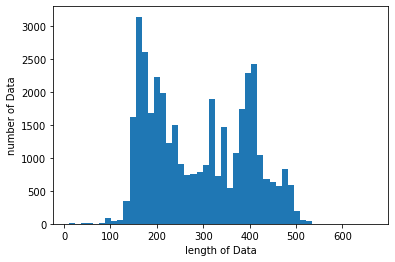

In [30]:
print("문자데이터의 최대 길이 :" , max(len(l) for l in X_train))
print("문자데이터의 평균 길이 : ", sum(map(len, X_train))/ len(X_train))
plt.hist([len(s) for s in X_train], bins=50)
plt.xlabel('length of Data')
plt.ylabel('number of Data')
plt.show()

문자데이터의 최대 길이 :  488
문자데이터의 평균 길이 :  126.09655596555966


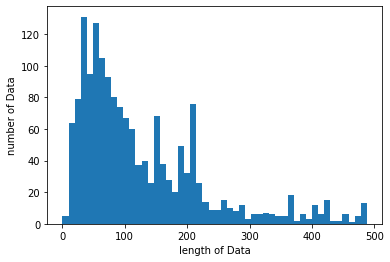

In [31]:
print("문자데이터의 최대 길이 : ", max(len(l) for l in X_test))
print("문자데이터의 평균 길이 : ", sum(map(len, X_test))/ len(X_test))
plt.hist([len(s) for s in X_test], bins=50)
plt.xlabel('length of Data')
plt.ylabel('number of Data')
plt.show()

In [0]:
from keras.utils import np_utils
import numpy as np

y_train = []

for i in range(len(new_df_desen['smishing'])):
  if new_df_desen['smishing'].iloc[i] == 1:
    y_train.append([0, 1])
  elif new_df_desen['smishing'].iloc[i] == 0:
    y_train.append([1, 0])

y_train = np.array(y_train)

In [0]:
from keras.layers import Embedding, Dense, LSTM
from keras.models import Sequential
from keras.preprocessing.sequence import pad_sequences

In [0]:
max_len = 666 # 전체 데이터의 길이를 666로 맞춘다

X_train = pad_sequences(X_train, maxlen=max_len)
X_test = pad_sequences(X_test, maxlen=max_len)

In [35]:
model = Sequential()
model.add(Embedding(max_words, 100))
model.add(LSTM(128))
model.add(Dense(2, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=5, batch_size=32, validation_split=0.1)






Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Train on 33665 samples, validate on 3741 samples
Epoch 1/5





33665/33665 [==============================] - 1230s 37ms/step - loss: 0.0320 - acc: 0.9924 - val_loss: 0.0107 - val_acc: 0.9971
Epoch 2/5
33665/33665 [==============================] - 1251s 37ms/step - loss: 0.0036 - acc: 0.9992 - val_loss: 0.0181 - val_acc: 0.9960
Epoch 3/5
33665/33665 [==============================] - 1262s 37ms/step - loss: 7.9947e-04 - acc: 0.9998 - val_loss: 0.0092 - val_acc: 0.9977
Epoch 4/5
33665/33665 [==============================] - 1255s 37ms/step - loss: 6.2380e-05 - acc: 1.0000 - val_loss: 0.0089 - val_acc: 0.9981
Epoch 5/5
33665/33665 [==============================] - 1258s 37ms/step - loss: 9.5502e-06 - acc: 1.0000 - val_loss: 0.0119 - val_acc: 0.9976


In [0]:
model.save("model_kb_dacon_04_1.h5")

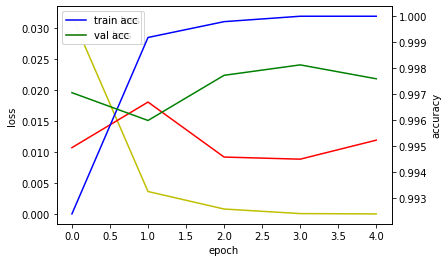

In [38]:
fig, loss_ax = plt.subplots()
acc_ax = loss_ax.twinx()

loss_ax.plot(history.history['loss'], 'y', label='train loss')
loss_ax.plot(history.history['val_loss'], 'r', label='val loss')
loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
loss_ax.legend(loc='upper left')

acc_ax.plot(history.history['acc'], 'b', label='train acc')
acc_ax.plot(history.history['val_acc'], 'g', label='val acc')
acc_ax.set_ylabel('accuracy')
acc_ax.legend(loc='upper left')

plt.show()

In [0]:
mypredict = model.predict(X_test)
submission_ids = list(test_data['id'])
my_result = []

for i in range(len(mypredict)):
  my_result.append(mypredict[i][1])

sub_dict = {"id":submission_ids, "smishing":my_result}
submission_df = pd.DataFrame(sub_dict)
submission_df.to_csv("kb_submission_04_1.csv", index=False, encoding='utf-8')

In [39]:
model2 = Sequential()
model2.add(Embedding(max_words, 100))
model2.add(LSTM(128))
model2.add(Dense(2, activation='sigmoid'))

model2.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history2 = model2.fit(X_train, y_train, epochs=4, batch_size=32, validation_split=0.1)

Train on 33665 samples, validate on 3741 samples
Epoch 1/4
33665/33665 [==============================] - 1248s 37ms/step - loss: 0.0315 - acc: 0.9895 - val_loss: 0.0065 - val_acc: 0.9984
Epoch 2/4
33665/33665 [==============================] - 1257s 37ms/step - loss: 0.0065 - acc: 0.9983 - val_loss: 0.0133 - val_acc: 0.9971
Epoch 3/4
33665/33665 [==============================] - 1259s 37ms/step - loss: 0.0013 - acc: 0.9997 - val_loss: 0.0185 - val_acc: 0.9944
Epoch 4/4
33665/33665 [==============================] - 1260s 37ms/step - loss: 0.0026 - acc: 0.9995 - val_loss: 0.0137 - val_acc: 0.9979


In [0]:
model.save("model_kb_dacon_04_2.h5")

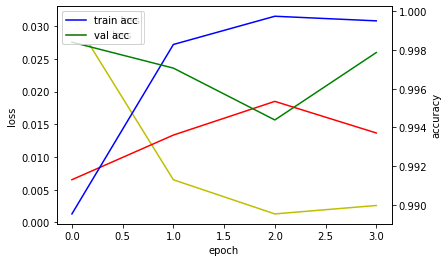

In [41]:
fig, loss_ax = plt.subplots()
acc_ax = loss_ax.twinx()

loss_ax.plot(history2.history['loss'], 'y', label='train loss')
loss_ax.plot(history2.history['val_loss'], 'r', label='val loss')
loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
loss_ax.legend(loc='upper left')

acc_ax.plot(history2.history['acc'], 'b', label='train acc')
acc_ax.plot(history2.history['val_acc'], 'g', label='val acc')
acc_ax.set_ylabel('accuracy')
acc_ax.legend(loc='upper left')

plt.show()

In [0]:
mypredict = model2.predict(X_test)
submission_ids = list(test_data['id'])
my_result = []

for i in range(len(mypredict)):
  my_result.append(mypredict[i][1])

sub_dict = {"id":submission_ids, "smishing":my_result}
submission_df = pd.DataFrame(sub_dict)
submission_df.to_csv("kb_submission_04_2.csv", index=False, encoding='utf-8')